Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.

A1. Clustering is the process of grouping similar data points together based on certain criteria. It's an unsupervised learning technique used to find inherent structures or patterns in data. Examples of clustering applications include:

Customer Segmentation: Grouping customers based on purchasing behavior.
Document Clustering: Organizing similar documents together.
Image Segmentation: Identifying regions with similar properties in images.
Anomaly Detection: Identifying unusual behavior in data.
Genetics: Clustering genes with similar expression patterns.
Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?

A2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups dense regions of points. Unlike k-means and hierarchical clustering, DBSCAN doesn't require specifying the number of clusters in advance and can find clusters of arbitrary shapes.

Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?

A3. The optimal values of epsilon and minimum points depend on the data distribution. Epsilon defines the radius of the neighborhood around a point, and minimum points determine the minimum number of points within that radius to form a dense region. Trial and error, as well as domain knowledge, are often used to set these parameters.

Q4. How does DBSCAN clustering handle outliers in a dataset?

A4. DBSCAN is robust to outliers. Outliers are treated as points that don't belong to any cluster and are labeled as noise. They are not assigned to any cluster and don't influence cluster formation.

Q5. How does DBSCAN clustering differ from k-means clustering?

A5. - DBSCAN is density-based, while k-means is centroid-based.

DBSCAN doesn't require specifying the number of clusters in advance.
DBSCAN can find clusters of arbitrary shapes, while k-means forms spherical clusters.
Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?

A6. Yes, DBSCAN can be applied to high-dimensional data. However, in high dimensions, the notion of "dense" becomes less intuitive, and the curse of dimensionality can lead to issues like the "border points problem," where almost all points are on the border of clusters. Proper distance metrics and preprocessing are important to address these challenges.

Q7. How does DBSCAN clustering handle clusters with varying densities?

A7. DBSCAN handles varying densities effectively. It can identify clusters with different densities and doesn't require clusters to have uniform shapes or sizes.

Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

A8. Common evaluation metrics include silhouette score, Davies-Bouldin index, and visual inspection of clusters.

Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

A9. Yes, DBSCAN can be used for semi-supervised learning by treating the unlabeled data as noise points and assigning labels to clusters. However, it's more commonly used for unsupervised tasks.

Q10. How does DBSCAN clustering handle datasets with noise or missing values?

A10. DBSCAN naturally handles noise by classifying it as noise points. For datasets with missing values, DBSCAN can treat missing values as special values or impute them based on the surrounding points.

Q11. Implement the DBSCAN algorithm using a Python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

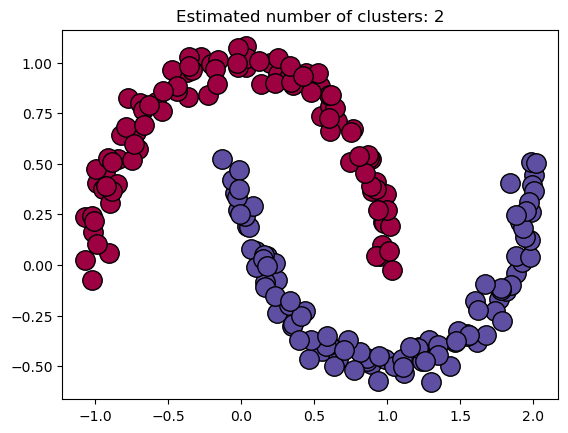

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise points

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()
